In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam

In [10]:
dataset = pd.read_csv('medium_data.csv')

In [11]:
dataset.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [12]:
dataset.shape

(6508, 10)

In [13]:
print("Number of records: ", dataset.shape[0])
print("Number of fields per record: ", dataset.shape[1])

Number of records:  6508
Number of fields per record:  10


In [35]:
df = dataset.copy()
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [36]:
df['title'].values

array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec\xa0Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in\xa0Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the\xa0Paper',
       'How To Write a Good Business Blog\xa0Post'], dtype=object)

In [37]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [39]:
df['title'] = df['title'].apply(lambda x: x.replace(u'\xa0',u' '))
df['title'] = df['title'].apply(lambda x: x.replace('\u200a',' '))

In [40]:
df['title'].values

array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the Paper',
       'How To Write a Good Business Blog Post'], dtype=object)

In [41]:
tokenizer = Tokenizer(oov_token='<oov>')

tokenizer.fit_on_texts(df['title'])

In [44]:
total_words = len(tokenizer.word_index)+1

In [45]:
print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [ ]:
dic = dict(tokenizer.word_counts)
sorted(dic.items(), key=lambda x: x[1], reverse=True)

In [63]:
titles = df['title'].values

In [64]:
titles

array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the Paper',
       'How To Write a Good Business Blog Post'], dtype=object)

In [ ]:
tokenizer.word_index

In [83]:
token_list = tokenizer.texts_to_sequences(titles)
token_list[0]

[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]

In [89]:
input_sequences = []

for tokens in token_list:
  for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

input_sequences[:9]

[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 452],
 [5, 676, 68, 2, 452, 1518],
 [5, 676, 68, 2, 452, 1518, 14],
 [5, 676, 68, 2, 452, 1518, 14, 2455],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]]

In [90]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sentences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sentences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
       676], dtype=int32)

In [104]:
max_sequence_len

40

In [92]:
xs, labels = input_sentences[:, :-1], input_sentences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [95]:
xs[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5], dtype=int32)

In [97]:
labels[0]

676

In [101]:
np.unique(ys[0], return_counts=True), total_words

((array([0., 1.], dtype=float32), array([8237,    1])), 8238)

In [105]:
model = Sequential()
model.add(Embedding(total_words, output_dim=100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823800    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8238)              2479638   
                                                                 
Total params: 3,604,638
Trainable params: 3,604,638
Non-trainable params: 0
_________________________________________________________________


In [108]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
history = model.fit(xs, ys, epochs=50)

Epoch 1/50
1515/1515 [==============================] - 23s 10ms/step - loss: 6.7602 - accuracy: 0.1299
Epoch 2/50
1515/1515 [==============================] - 17s 11ms/step - loss: 5.7377 - accuracy: 0.1798
Epoch 3/50
1515/1515 [==============================] - 14s 10ms/step - loss: 4.9285 - accuracy: 0.2061
Epoch 4/50
1515/1515 [==============================] - 15s 10ms/step - loss: 4.1820 - accuracy: 0.2494
Epoch 5/50
1515/1515 [==============================] - 15s 10ms/step - loss: 3.6315 - accuracy: 0.3005
Epoch 6/50
1515/1515 [==============================] - 15s 10ms/step - loss: 3.2435 - accuracy: 0.3443
Epoch 7/50
1515/1515 [==============================] - 15s 10ms/step - loss: 2.9965 - accuracy: 0.3751
Epoch 8/50
1515/1515 [==============================] - 15s 10ms/step - loss: 2.8255 - accuracy: 0.3986
Epoch 9/50
1515/1515 [==============================] - 14s 10ms/step - loss: 2.7066 - accuracy: 0.4182
Epoch 10/50
1515/1515 [==============================] - 15s 10m

In [111]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

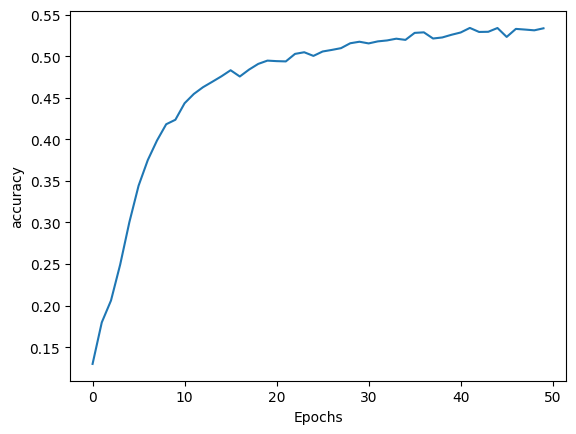

In [112]:
plot_graphs(history, 'accuracy')

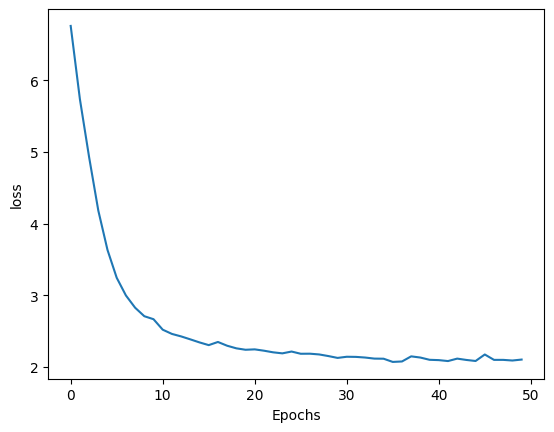

In [113]:
plot_graphs(history, 'loss')

In [208]:
def predict_words(sent, words):
  output_word = []

  for num_word in range(words):
    token_list = tokenizer.texts_to_sequences([sent])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list)
    predicted = np.squeeze(predicted)

    preds = np.argsort(predicted)

    pred = preds[(num_word+1)*-1]
    
    for word, index in tokenizer.word_index.items():
      if index == pred:
        output_word.append(word)
        break

  return output_word


In [209]:
predict_words("I", 3)

1/1 [==============================] - 0s 30ms/step


['bought', 'didn’t', 'decided']